In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_pickle("data/lbc_pandas.pkl")

In [4]:
from sklearn.decomposition import PCA,KernelPCA
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import Normalizer

careof = ['price_sqm','Meuble','Surface','ClasseEnergie_int','Arrondissement','weekday','ins_hour']
df2 = df[(df.ClasseEnergie_lit != 'V') & (df.ClasseEnergie_lit != 'N') & (df.ClasseEnergie_lit != 'X')]
X = df2[careof].dropna()
normalizer = Normalizer()
Xa = normalizer.fit_transform(sns.np.array(X,dtype=float))

In [5]:
pca = PCA(n_components=3)
pca.fit(Xa)
X_r = pca.transform(Xa)
print Xa[1]

[ 0.53343653  0.01632969  0.73483604  0.06531876  0.24494535  0.06531876
  0.32659379]


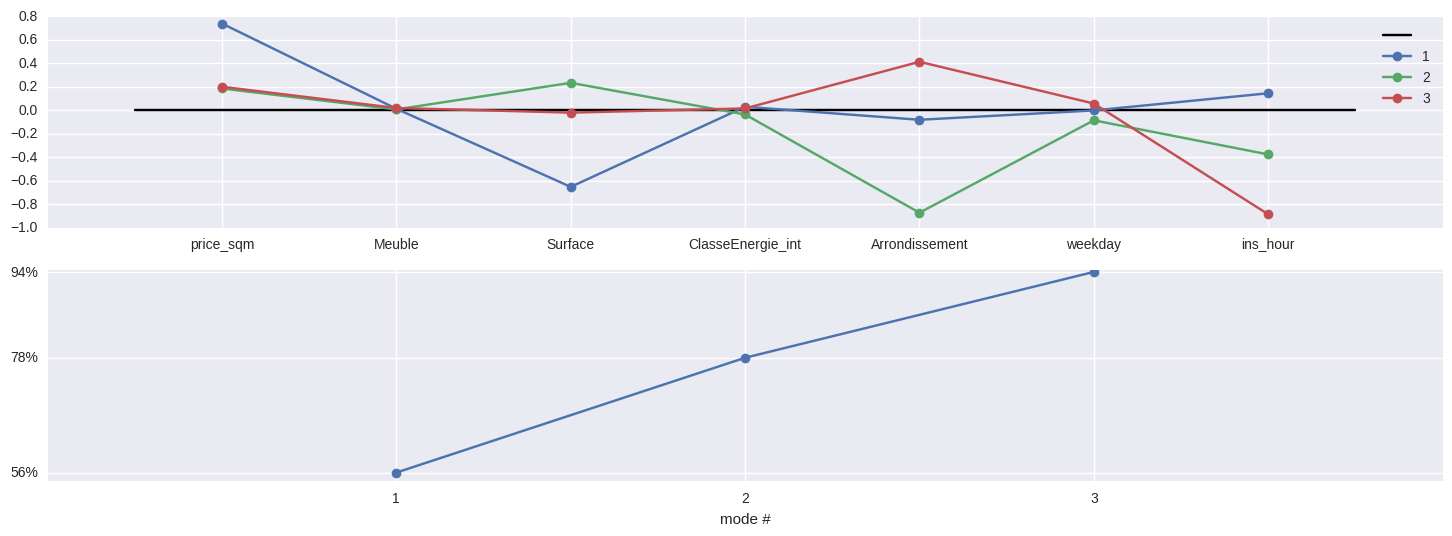

In [8]:
cols = X.columns
ncols = len(cols)
modes = pca.explained_variance_ratio_
nmodes = len(modes)
f,(ax,bx)=sns.plt.subplots(2,1,figsize=[18,6])
ax.plot([-.5,ncols-.5],[0,0],'-k')

ax.plot(pca.components_.T,'-o')
ax.xaxis.set_ticks(range(ncols))
ax.xaxis.set_ticklabels(cols)
ax.set_xlim(-1,ncols)

bx.plot(range(1,nmodes+1),np.cumsum(modes*100),'-o')
bx.set_xlim(0,nmodes+1)
bx.xaxis.set_ticks(range(1,nmodes+1))
bx.yaxis.set_ticks(np.cumsum(modes*100))
bx.yaxis.set_ticklabels(['%d%%'%j for j in np.cumsum(modes*100)])
bx.set_xlabel('mode #')
_=ax.legend(' 123')